<a href="https://colab.research.google.com/github/KhushiJain1209/FlipKart_SocialMedia_SentimentAnalysis/blob/main/SentimentAnalysis_FlipKart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
# Install Libraries
!pip install textblob
!pip install tweepy
!pip install twython
!pip install pycountry
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [78]:
# Import Libraries
from textblob import TextBlob
import sys
import tweepy
import twython
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import pycountry
import re
import string
import langdetect

In [79]:
import nltk
nltk.downloader.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [80]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from twython import Twython

In [81]:
APP_KEY = "EdiBb4Ti7xTBUIQ5ieXqBTMXY"
APP_SECRET = "fGcZtWrQvI65QwURpyAmDagOINAn0U5pbi4tDjeuswL9gbiSCB"
OAUTH_TOKEN = "1491381747094724610-IOPkNl8UXCR5bcQRAhozjTKEkg6n6X"
OAUTH_TOKEN_SECRET = "ncEjHoXGzwJHQuBejYNeYxVCdiwtB3BqZ6c8joIzHNZEr"
auth = tweepy.OAuthHandler(APP_KEY, APP_SECRET)
auth.set_access_token(OAUTH_TOKEN, OAUTH_TOKEN_SECRET)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [82]:
#Sentiment Analysis
def percentage(part,whole):
  return 100 * float(part)/float(whole)
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []
keyword = '#FlipKart OR @FlipKart'
noOfTweet = 5000
tweets = tweepy.Cursor(api.search, q=keyword).items(noOfTweet)
positive = 0
negative = 0
neutral = 0
polarity = 0

for tweet in tweets:
    #print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
 
    if neg > pos:
      negative_list.append(tweet.text)
      negative += 1
    elif pos > neg:
      positive_list.append(tweet.text)
      positive += 1
    elif pos == neg:
      neutral_list.append(tweet.text)
      neutral += 1
positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

In [83]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))
tweets_users_df = pd.DataFrame()
tweets_users_df = tweets_users_df.append(tweet_list)
tweets_users_df.to_csv('FlipKart_tweets.csv', index=False)

total number:  5000
positive number:  1506
negative number:  1762
neutral number:  1732


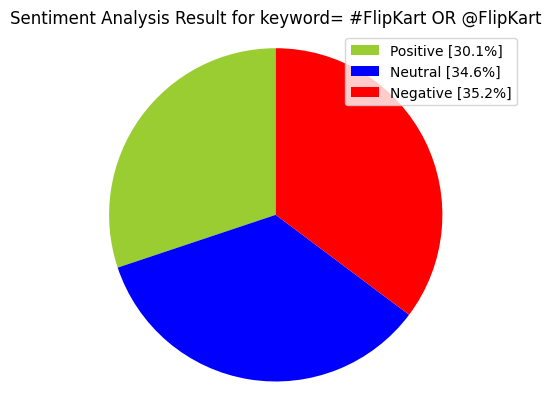

In [84]:
#Creating PieCart
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword= "+keyword+"" )
plt.axis('equal')
plt.show()

In [85]:
tweet_list

,0
0,@Flipkart You and your partner Jeeves service...
1,#Nothingphone1 #Flipkart facing the glyph issu...
2,RT @realmeTechLife: Your very own personal the...
3,#flipkartsupport #Flipkart \nमुझे अभी तक ऑर्डर...
4,@motorolaindia @Flipkart Please bring 2-3 comp...
...,...
4995,@Flipkart @flipkartsupport \nI think Flipkart ...
4996,Flipkart delivery agent showing so much profes...
4997,RT @TinaDut26961785: Enough is enough!!\n@Flip...
4998,RT @Suukoonhandmate: @Flipkart @FlipkartSeller...


In [86]:
tweet_list.drop_duplicates(inplace = True)

In [87]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0–9]+)|([-⁰9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,@Flipkart You and your partner Jeeves service...,...
1,#Nothingphone1 #Flipkart facing the glyph issu...,# 1 # ...
2,RT @realmeTechLife: Your very own personal the...,...
3,#flipkartsupport #Flipkart \nमुझे अभी तक ऑर्डर...,# # \nमुझे अभी तक ऑर्डर...
4,@motorolaindia @Flipkart Please bring 2-3 comp...,2 3 5.8...
5,"RT @realmeTechLife: #HeyCreatives, make your i...","# , ..."
6,@flipkartsupport @Flipkart #NoMoreFlipkart #Wo...,# # \n...
7,RT @realmeTechLife: Every image comes to life ...,...
8,@Flipkart Even worst service by Technician who...,...
9,RT @realmeTechLife: Go on a creative spree wit...,"60.5 (23.8""..."


In [88]:
#Calculating Negative, Positive, Neutral and Compound values
tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
      tw_list.loc[index, 'sentiment'] = "negative"
      neg += 1
    elif pos > neg:
      tw_list.loc[index, 'sentiment'] = "positive"
      pos += 1
    elif pos == neg:
      tw_list.loc[index, 'sentiment'] = "neutral"
      neu += 1
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp
tw_list.head(10)


,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,@Flipkart You and your partner Jeeves service...,...,0.0,0.0,neutral,0.0,2.0,0.0,0.0
1,#Nothingphone1 #Flipkart facing the glyph issu...,# 1 # ...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
2,RT @realmeTechLife: Your very own personal the...,...,0.0,0.0,neutral,0.0,2.0,0.0,0.0
3,#flipkartsupport #Flipkart \nमुझे अभी तक ऑर्डर...,# # \nमुझे अभी तक ऑर्डर...,0.0,0.0,neutral,0.0,2.0,0.0,0.0
4,@motorolaindia @Flipkart Please bring 2-3 comp...,2 3 5.8...,0.0,0.0,neutral,0.0,2.0,0.0,0.0
5,"RT @realmeTechLife: #HeyCreatives, make your i...","# , ...",0.0,0.0,neutral,0.0,2.0,0.0,0.0
6,@flipkartsupport @Flipkart #NoMoreFlipkart #Wo...,# # \n...,0.0,0.0,neutral,0.0,2.0,0.0,0.0
7,RT @realmeTechLife: Every image comes to life ...,...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
8,@Flipkart Even worst service by Technician who...,...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
9,RT @realmeTechLife: Go on a creative spree wit...,"60.5 (23.8""...",0.0,0.0,neutral,0.0,2.0,0.0,0.0


In [89]:
#Creating new data frames for all sentiments (positive, negative and neutral)
tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [90]:
def count_values_in_column(data,feature):
  total=data.loc[:,feature].value_counts(dropna=False)
  percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
  return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
neutral,3904,99.77
negative,7,0.18
positive,2,0.05


In [94]:
#Function to Create Wordcloud
def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
    mask = mask,
    max_words=3000,
    stopwords=stopwords,
    repeat=True)
    wc = wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))
# plt.imshow(create_wordcloud("text"), interpolation='bilinear')
# plt.axis("off")
# plt.show()

Word Cloud Saved Successfully


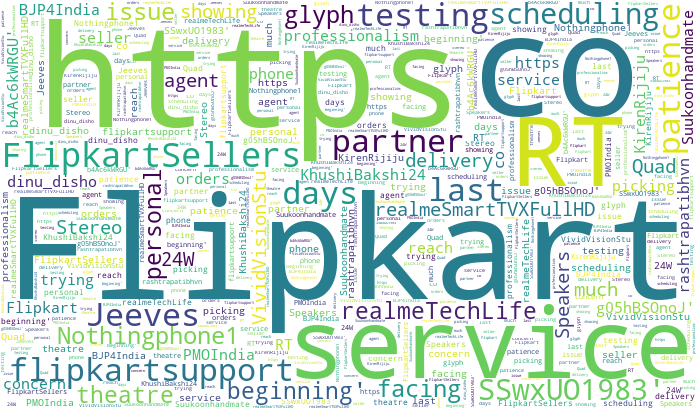

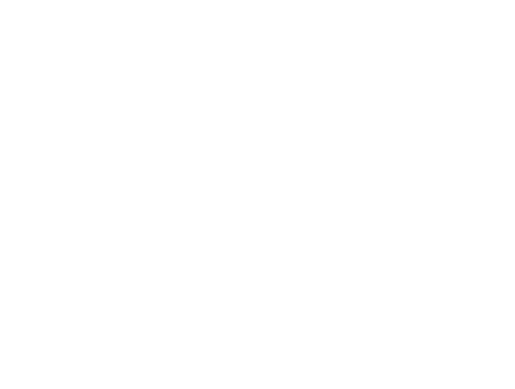

In [95]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list[0].values)
plt.axis("off")
plt.show()

Word Cloud Saved Successfully


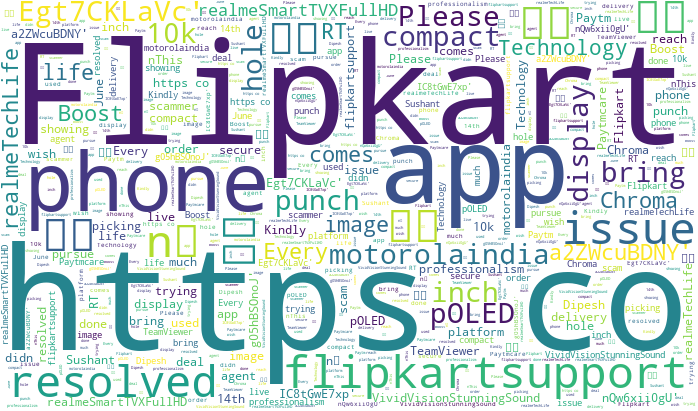

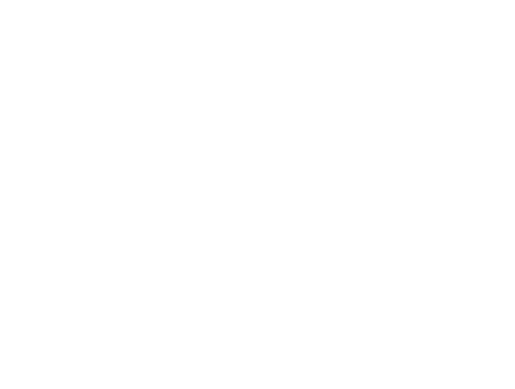

In [96]:
#Creating wordcloud for positive sentiment
create_wordcloud(positive_list[0].values)
plt.axis("off")
plt.show()

Word Cloud Saved Successfully


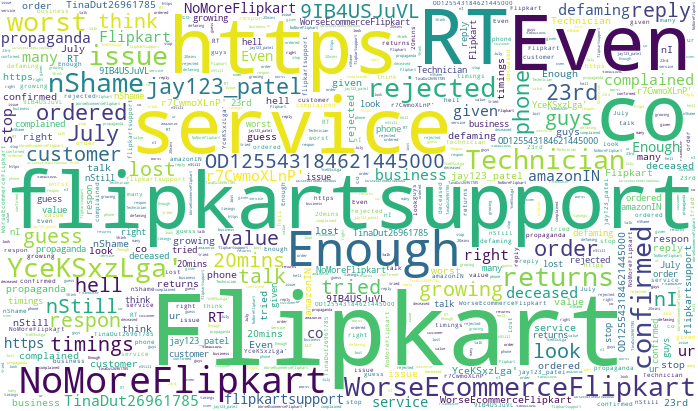

In [97]:
#Creating wordcloud for negative sentiment
create_wordcloud(negative_list[0].values)

In [98]:
#Calculating tweet’s lenghth and word count
tweet_list['text_len'] = tweet_list['text'].astype(str).apply(len)
tweet_list['text_word_count'] = tweet_list['text'].apply(lambda x: len(str(x).split()))
round(pd.DataFrame(tweet_list.groupby("sentiment").text_len.mean()),2)

,text_len
sentiment,
negative,88.29
neutral,97.84
positive,89.00


In [99]:
round(pd.DataFrame(tweet_list.groupby("sentiment").text_word_count.mean()),2)

,text_word_count
sentiment,
negative,7.86
neutral,6.23
positive,9.00
